3488742


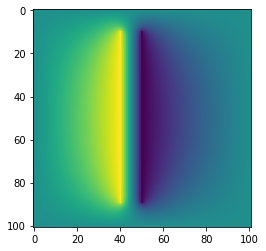

In [2]:
from numpy import empty, zeros, max, ones
from pylab import imshow, gray, show
omega = 0.9
M = 100
V = 1.0
target = 1e-6
count = 0

#create arrays to hold potential values
phi = zeros([M+1,M+1],float)

for i in range(10,90):
    for j in range(40,41):
        phi[i,j] = 1
        
for i in range(10,90):
    for j in range(50,51):
        phi[i,j] = -1        

phiprime = empty([M+1,M+1],float)

#main loop
delta = 1.0
while delta > target:
    #calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            elif i >= 10 and i < 90 and j >= 40 and j < 41:
                phiprime[i,j] =  1/4
            elif i >= 10 and i < 90 and j >= 50 and j < 51:
                phiprime[i,j] =  -1/4
            else:
                phiprime[i,j] = (1+omega)*(phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - omega*phiprime[i,j]
            count += 1    
    
    #calculate maximum difference from old values
    delta = max(abs(phi - phiprime))
    
    #swap the two arrays around
    phi, phiprime = phiprime, phi
#     print(phiprime[50,50])
print(count)
imshow(phi)
#gray()
show()